# Merging different grids together

## Notes
Merging grids via `ModelGrid.merge` operates in-place. This means that you can chain merges together (see last example) but it also means that trial-and-error is tricky. Soon in the future, merges will return a copy to avoid this hassle.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

import pygridgen as pgg
import pygridtools as pgt

import seaborn
seaborn.set(style='white')

%matplotlib inline

## Create 3 model grids moving counter-clockwise in the axis

In [2]:
def make_test_grids():
    domain1 = pandas.DataFrame({'x': [2, 5, 5, 2], 'y': [6, 6, 4, 4], 'beta': [1, 1, 1, 1]})
    domain2 = pandas.DataFrame({'x': [6, 11, 11, 5], 'y': [5, 5, 3, 3], 'beta': [1, 1, 1, 1]})
    domain3 = pandas.DataFrame({'x': [7, 9, 9, 7], 'y': [2, 2, 0, 0], 'beta': [1, 1, 1, 1]})

    grid1 = pgt.makeGrid(domain=domain1, nx=6, ny=5, rawgrid=False)
    grid2 = pgt.makeGrid(domain=domain2, nx=8, ny=7, rawgrid=False)
    grid3 = pgt.makeGrid(domain=domain3, nx=4, ny=10, rawgrid=False)
    
    return grid1, grid2, grid3


## Display positions of grids relative to each other

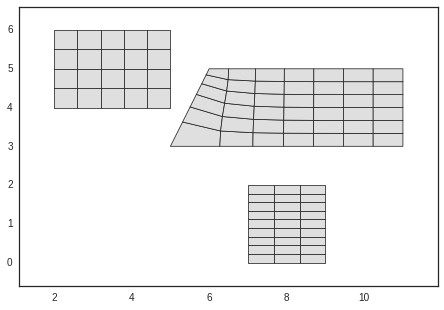

In [3]:
grid1, grid2, grid3 = make_test_grids()

fig, ax = plt.subplots(figsize=(7.5, 7.5))
fig = grid1.plotCells(ax=ax)
fig = grid2.plotCells(ax=ax)
fig = grid3.plotCells(ax=ax)

## Merge grids 1 and 2 together, horizontally
By default, the bottom rows are aligned and the cell mask is not updated. We do that manually for now.

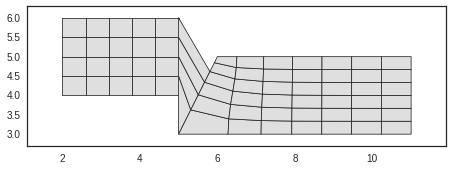

In [4]:
grid1.merge(grid2, how='horiz')
grid1.cell_mask = np.ma.masked_invalid(grid1.xc).mask
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fig = grid1.plotCells(ax=ax)

## Use the shift parameter to center grid 2
Use `shift=-1` since we're sliding grid 2's i-j indexes downward relative to grid 1

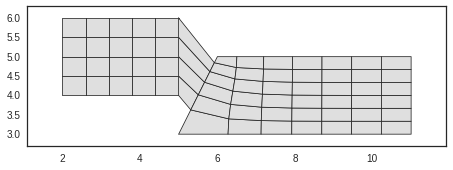

In [5]:
grid1, grid2, grid3 = make_test_grids()
grid1.merge(grid2, how='horiz', shift=-1)
grid1.cell_mask = np.ma.masked_invalid(grid1.xc).mask
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fig = grid1.plotCells(ax=ax)

## Verticall merge grid 2 and grid 3
Notice that by default, the grids are left-aligned and the *bottom* of grid 3 ties into the *top* of grid 2

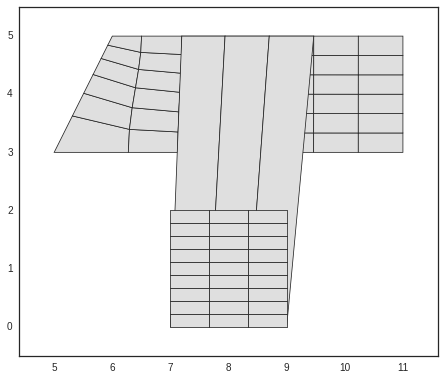

In [6]:
grid1, grid2, grid3 = make_test_grids()
grid2.merge(grid3, how='vert', shift=2)
grid2.cell_mask = np.ma.masked_invalid(grid2.xc).mask
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fig = grid2.plotCells(ax=ax)

## Try again, switching the order of the grids
Notice the change in sign of the `shift` parameter.

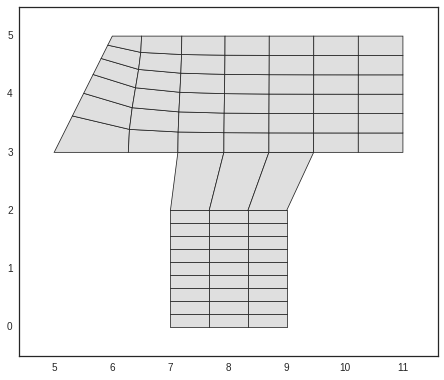

In [7]:
grid1, grid2, grid3 = make_test_grids()
grid3.merge(grid2, how='vert', shift=-2)
grid3.cell_mask = np.ma.masked_invalid(grid3.xc).mask
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fig = grid3.plotCells(ax=ax)

## Alternatively, you can use `where='-'` to indicate that the "other" grid is below the first.
And the sign of the `shift` parameter returns to its original value.

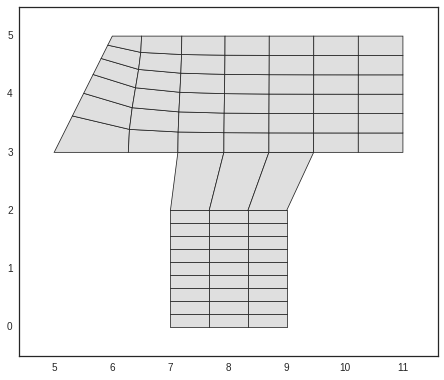

In [8]:
grid1, grid2, grid3 = make_test_grids()
grid2.merge(grid3, how='vert', where='-', shift=2)
grid2.cell_mask = np.ma.masked_invalid(grid2.xc).mask
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fig = grid2.plotCells(ax=ax)

## Now merge all three in a single chained operation.

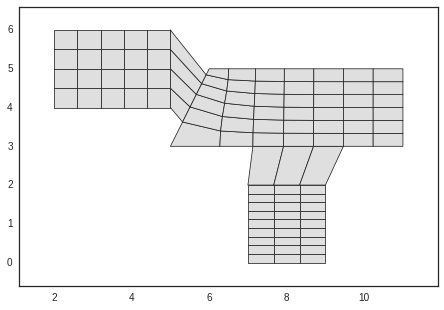

In [9]:
grid1, grid2, grid3 = make_test_grids()
(
    grid2.merge(grid3, how='vert', where='-', shift=2)
         .merge(grid1, how='horiz', where='-', shift=11) 
)

grid2.cell_mask = np.ma.masked_invalid(grid2.xc).mask
fig, ax = plt.subplots(figsize=(7.5, 7.5))
fig = grid2.plotCells(ax=ax)